# Linear Classification

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
print("Trian score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 33ms/step - loss: 1.4366 - accuracy: 0.2257 - val_loss: 1.4269 - val_accuracy: 0.2340
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 1.3261 - accuracy: 0.2572 - val_loss: 1.3298 - val_accuracy: 0.2766
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.2236 - accuracy: 0.3123 - val_loss: 1.2391 - val_accuracy: 0.2872
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1311 - accuracy: 0.3517 - val_loss: 1.1546 - val_accuracy: 0.3670
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0446 - accuracy: 0.4147 - val_loss: 1.0776 - val_accuracy: 0.4149
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9658 - accuracy: 0.4646 - val_loss: 1.0066 - val_accuracy: 0.4574
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8944 - accuracy: 0.4856 - val_loss: 0.9424 - val_accuracy: 0.5000
Epoch 8/100


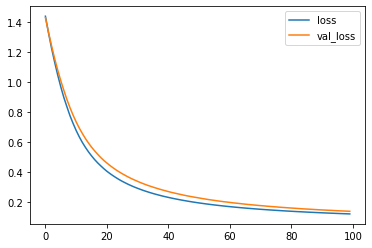

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

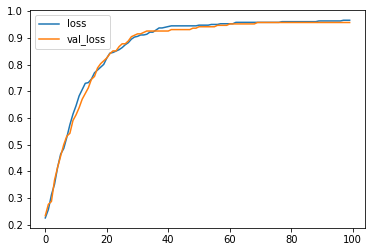

In [15]:
plt.plot(r.history['accuracy'], label='loss')
plt.plot(r.history['val_accuracy'], label='val_loss')
plt.legend()

# Making predictions

In [16]:
P = model.predict(X_test)
print(P)

[[3.2945365e-01]
 [9.4554806e-01]
 [9.9666452e-01]
 [5.1022470e-03]
 [9.8060507e-01]
 [1.2731889e-01]
 [9.9816084e-01]
 [9.7805077e-01]
 [8.7327076e-05]
 [8.3515269e-01]
 [1.6403070e-01]
 [8.5724127e-01]
 [1.6669542e-02]
 [9.7946882e-01]
 [9.9540985e-01]
 [9.0829062e-01]
 [9.9307966e-01]
 [2.2486821e-01]
 [9.8104596e-01]
 [9.9892628e-01]
 [9.8954594e-01]
 [8.8406682e-01]
 [8.9358401e-01]
 [2.2034907e-01]
 [3.1710863e-03]
 [3.6653608e-02]
 [8.1130803e-02]
 [9.7531801e-01]
 [9.8174924e-01]
 [9.8852098e-01]
 [1.4397800e-03]
 [9.3117267e-02]
 [9.6217048e-01]
 [9.9652350e-01]
 [5.3451449e-01]
 [5.2855223e-02]
 [9.9979001e-01]
 [8.9929342e-01]
 [8.1331909e-02]
 [1.7125010e-03]
 [9.7900826e-01]
 [4.3552279e-02]
 [9.5978677e-01]
 [9.8768532e-01]
 [8.8067949e-01]
 [6.9584697e-02]
 [9.8830205e-01]
 [9.9000132e-01]
 [1.9846350e-02]
 [7.1308546e-05]
 [3.5184592e-02]
 [4.3995583e-01]
 [8.7064040e-01]
 [9.8076475e-01]
 [3.8433075e-04]
 [9.9220860e-01]
 [9.4718766e-01]
 [9.4304943e-01]
 [7.6518035e-0

In [17]:
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.]


In [18]:
print("Manually calculated accuracy: ", np.mean(P == y_test))
print("Evaluate output: ", model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9574468085106383
6/6 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9574
Evaluate output:  [0.1365301012992859, 0.957446813583374]


# Saving and loading a Model

In [19]:
model.save('linear-classifier.h5')

In [20]:
!ls -al

total 188
drwxr-xr-x 1 saiki 197609     0 Nov 20 07:31 .
drwxr-xr-x 1 saiki 197609     0 Nov 20 05:38 ..
drwxr-xr-x 1 saiki 197609     0 Nov 20 07:30 .ipynb_checkpoints
-rw-r--r-- 1 saiki 197609 62593 Nov 20 07:31 1. Linear Classification.ipynb
-rw-r--r-- 1 saiki 197609 85065 Nov 20 07:31 Regression.ipynb
drwxr-xr-x 1 saiki 197609     0 Nov 20 07:12 env
-rw-r--r-- 1 saiki 197609 18480 Nov 20 07:31 linear-classifier.h5
-rw-r--r-- 1 saiki 197609  2302 Nov 20 07:31 moore.csv
-rw-r--r-- 1 saiki 197609  1531 Nov 20 07:12 requirements.txt


In [21]:
model = tf.keras.models.load_model('linear-classifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.9574


[0.1365301012992859, 0.957446813583374]